### Models developed
#### 1. XGBoost
#### 2. SVR

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import seed
seed(123)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time

from IPython.display import SVG
import seaborn as sns

from sklearn.svm import SVR
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1
from keras import optimizers

* Import datasets

In [3]:
X_train19 = pd.read_excel('data/final version training_test set/X_train19.xlsx')
y_train19 = pd.read_excel('data/final version training_test set/y_train19.xlsx')
X_test19 = pd.read_excel('data/final version training_test set/X_test19.xlsx')
y_test19 = pd.read_excel('data/final version training_test set/y_test19.xlsx')

X_train20 = pd.read_excel('data/final version training_test set/X_train20.xlsx')
y_train20 = pd.read_excel('data/final version training_test set/y_train20.xlsx')
X_test20 = pd.read_excel('data/final version training_test set/X_test20.xlsx')
y_test20 = pd.read_excel('data/final version training_test set/y_test20.xlsx')

In [7]:
X_train19.set_index('id', inplace=True)
y_train19.set_index('id', inplace=True)
X_test19.set_index('id', inplace=True)
y_test19.set_index('id', inplace=True)

X_train20.set_index('id', inplace=True)
y_train20.set_index('id', inplace=True)
X_test20.set_index('id', inplace=True)
y_test20.set_index('id', inplace=True)

In [8]:
X_train19.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,review_year,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,...,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,review_month_review_April,review_month_review_Aug,review_month_review_July,review_month_review_June,review_month_review_May,review_month_review_Sept
id,,,,,,,,,,,,,,,,,,,,,
32237469,2,2,371,349,2019,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
30535905,6,1,1,31,2019,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
16229170,1,29,2,311,2019,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
380416,4,23,2,320,2019,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
38157241,1,3,1,330,2019,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


### 1. Build XGBoost

In [9]:
xgb_reg_start = time.time()

xgb_reg1 = xgb.XGBRegressor()
xgb_reg1.fit(X_train19, y_train19)
training_preds_19 = xgb_reg1.predict(X_train19)
val_preds_19 = xgb_reg1.predict(X_test19)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train19, training_preds_19),4))
print("Validation MSE:", round(mean_squared_error(y_test19, val_preds_19),4))
print("\nTraining r2:", round(r2_score(y_train19, training_preds_19),4))
print("Validation r2:", round(r2_score(y_test19, val_preds_19),4))

Time taken to run: 0.0 minutes

Training MSE: 1534.1267
Validation MSE: 2264.0745

Training r2: 0.6999
Validation r2: 0.5717


In [10]:
xgb_reg_start = time.time()

xgb_reg2 = xgb.XGBRegressor()
xgb_reg2.fit(X_train20, y_train20)
training_preds_20 = xgb_reg2.predict(X_train20)
val_preds_20 = xgb_reg2.predict(X_test20)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train20, training_preds_20),4))
print("Validation MSE:", round(mean_squared_error(y_test20, val_preds_20),4))
print("\nTraining r2:", round(r2_score(y_train20, training_preds_20),4))
print("Validation r2:", round(r2_score(y_test20, val_preds_20),4))

Time taken to run: 0.0 minutes

Training MSE: 1069.2664
Validation MSE: 1954.8918

Training r2: 0.7092
Validation r2: 0.4835


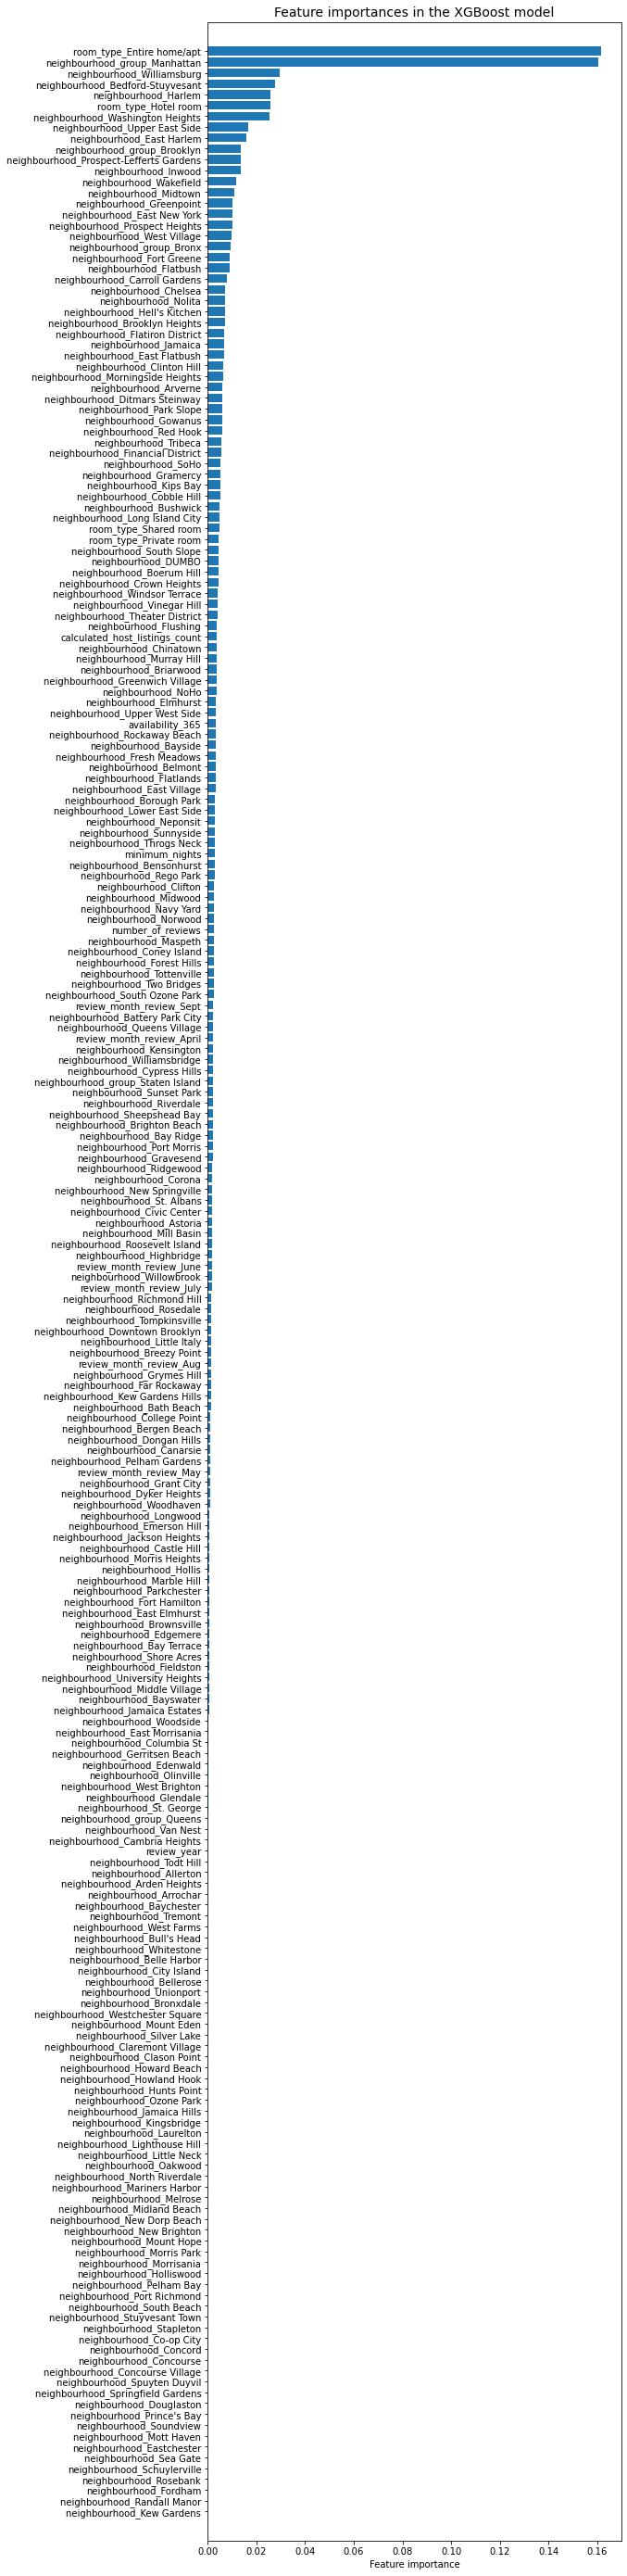

In [12]:
# important features selected by XGBoost  2019
ft_weights_xgb_reg19 = pd.DataFrame(xgb_reg1.feature_importances_, columns=['weight'], index=X_train19.columns)
ft_weights_xgb_reg19.sort_values('weight', inplace=True)

plt.figure(figsize=(8,50))
plt.barh(ft_weights_xgb_reg19.index, ft_weights_xgb_reg19.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

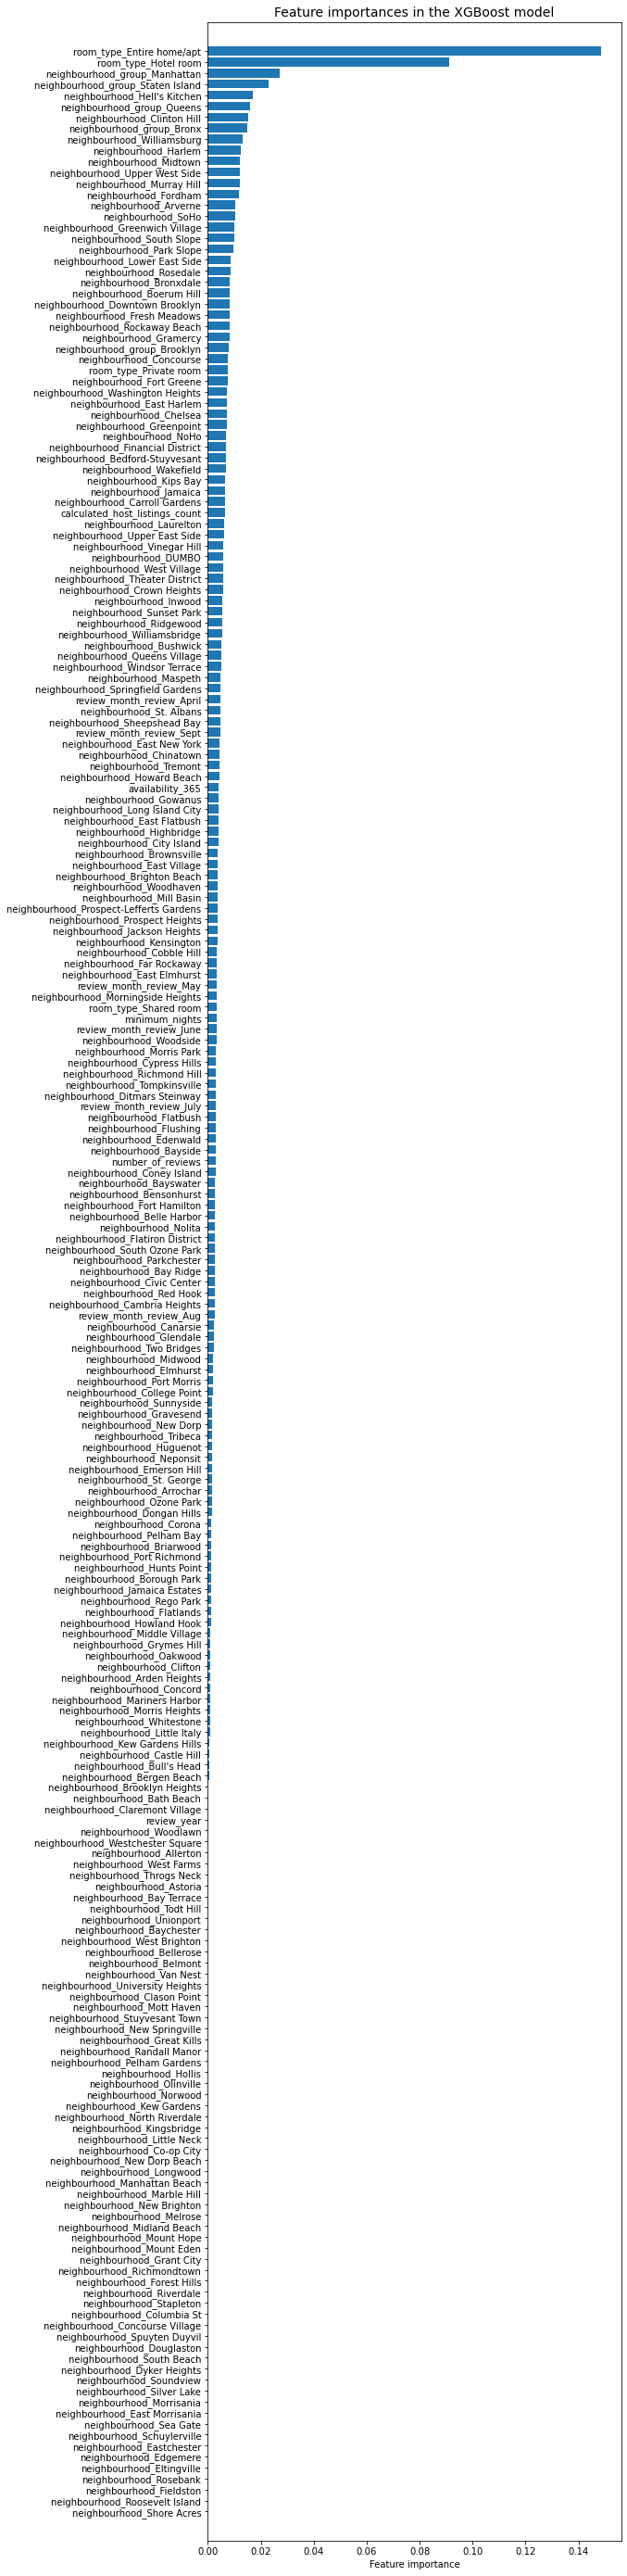

In [13]:
# important features selected by XGBoost 2020
ft_weights_xgb_reg2 = pd.DataFrame(xgb_reg2.feature_importances_, columns=['weight'], index=X_train20.columns)
ft_weights_xgb_reg2.sort_values('weight', inplace=True)

plt.figure(figsize=(8,50))
plt.barh(ft_weights_xgb_reg2.index, ft_weights_xgb_reg2.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

### SVR Model

In [14]:
def print_evaluation_metrics(trained_model, trained_model_name, X_test, y_test):
    print('--------- For Model: ', trained_model_name, ' ---------(Test data)\n')
    predicted_values = trained_model.predict(X_test)
    print("Mean squared error: ", metrics.mean_squared_error(
        y_test, predicted_values))
    print("R2: ", metrics.r2_score(y_test, predicted_values))

def print_evaluation_metrics2(trained_model, trained_model_name, X_test, y_test):
    print('--------- For Model: ', trained_model_name, ' --------- (Training Data)\n')
    predicted_values = trained_model.predict(X_test)
    print("Mean squared error: ", metrics.mean_squared_error(
        y_test, predicted_values))
    print("R2: ", metrics.r2_score(y_test, predicted_values))


In [15]:
def svm(X_train, y_train, X_val, y_val):
    model = SVR(gamma = 0.05, verbose = True) #was empty #0.1 #the - best gamma 0.05, c=0.5
    model.fit(X_train, y_train)
    print_evaluation_metrics(model, "svm", X_val, y_val.values.ravel())
    print_evaluation_metrics2(model, "svm", X_train, y_train.values.ravel())

In [16]:
svm(X_train19,y_train19, X_test19, y_test19)

C:\Users\yueli\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LibSVM]--------- For Model:  svm  ---------(Test data)

Mean squared error:  5527.909161492576
R2:  -0.045794869469395705
--------- For Model:  svm  --------- (Training Data)

Mean squared error:  5231.158841949294
R2:  -0.023306699385680085


In [17]:
svm(X_train20,y_train20, X_test20, y_test20)

[LibSVM]

C:\Users\yueli\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


--------- For Model:  svm  ---------(Test data)

Mean squared error:  3962.888201946392
R2:  -0.047071679508033926
--------- For Model:  svm  --------- (Training Data)

Mean squared error:  3728.171613949955
R2:  -0.014057639359398078
